# Dry Bean SÄ±nÄ±flandÄ±rmasÄ±: Makine Ã–ÄŸrenmesiyle TÃ¼r TanÄ±mlama

# Dry Bean SÄ±nÄ±flandÄ±rmasÄ±: Makine Ã–ÄŸrenmesiyle TÃ¼r TanÄ±mlama

Bu projede, UCI Machine Learning Repository'den alÄ±nan Dry Bean Dataset kullanÄ±larak Ã§eÅŸitli kuru baklagil tÃ¼rlerinin sÄ±nÄ±flandÄ±rÄ±lmasÄ± hedeflenmektedir. Proje kapsamÄ±nda veri Ã¶n iÅŸleme, aykÄ±rÄ± deÄŸer tespiti, Ã¶znitelik Ã§Ä±karÄ±mÄ± (PCA, LDA), modelleme (Logistic Regression, Decision Tree, Random Forest, XGBoost, Naive Bayes) ve nested cross-validation ile deÄŸerlendirme adÄ±mlarÄ± gerÃ§ekleÅŸtirilecektir. ROC eÄŸrileri Ã§izilerek modellerin sÄ±nÄ±flar arasÄ± ayÄ±rt etme baÅŸarÄ±mÄ± gÃ¶rsel olarak sunulacaktÄ±r.

## Dry Bean Dataset â€“ Ä°Ã§erik Ã–zeti:

16 Ã¶znitelik ("Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "Roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4")

7 sÄ±nÄ±f (Seker, Barbunya, Bombay, Cali, Horoz, Sira, Dermason)

Toplam 13.611 Ã¶rnek

Dataset linki: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [5]:
import pandas as pd

data = {
    "Ã–zellikler": [
        "Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio",
        "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity",
        "Roundness", "Compactness", "ShapeFactor1", "ShapeFactor2",
        "ShapeFactor3", "ShapeFactor4", "Class"
    ],
    "TÃ¼rÃ¼": [
        "Tam sayÄ±", "SÃ¼rekli", "SÃ¼rekli", "SÃ¼rekli", "SÃ¼rekli",
        "SÃ¼rekli", "Tam sayÄ±", "SÃ¼rekli", "SÃ¼rekli", "SÃ¼rekli",
        "SÃ¼rekli", "SÃ¼rekli", "SÃ¼rekli", "SÃ¼rekli",
        "SÃ¼rekli", "SÃ¼rekli", "Kategorik"
    ],
    "AÃ§Ä±klama": [
        "Bir fasulye bÃ¶lgesinin alanÄ± ve sÄ±nÄ±rlarÄ± iÃ§indeki piksel sayÄ±sÄ±",
        "Fasulyenin Ã§evresi, kenar uzunluÄŸu olarak tanÄ±mlanÄ±r",
        "Bir fasulyeden Ã§izilebilecek en uzun Ã§izgi arasÄ±ndaki mesafe",
        "Ana eksene dik ÅŸekilde durarak fasulyeden Ã§izilebilecek en uzun Ã§izgi",
        "MajorAxisLength ve MinorAxisLength arasÄ±ndaki iliÅŸkiyi tanÄ±mlar",
        "AynÄ± momentlere sahip elipsin dÄ±ÅŸmerkezliÄŸi",
        "Fasulye tohumunu iÃ§erebilecek en kÃ¼Ã§Ã¼k dÄ±ÅŸbÃ¼key Ã§okgenin piksel sayÄ±sÄ±",
        "AynÄ± alana sahip bir dairenin Ã§apÄ± olarak tanÄ±mlanan eÅŸdeÄŸer Ã§ap",
        "Fasulye alanÄ±nÄ±n Ã§evreleyen kutudaki piksellere oranÄ±",
        "Fasulyelerde bulunan dÄ±ÅŸbÃ¼key kabuklara benzer piksellerin oranÄ±",
        "(4piA)/(P^2) formÃ¼lÃ¼ ile hesaplanan yuvarlaklÄ±k deÄŸeri",
        "Bir nesnenin yuvarlaklÄ±ÄŸÄ±nÄ± Ã¶lÃ§er",
        "Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik",
        "Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik",
        "Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik",
        "Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik",
        "(Seker, Barbunya, Bombay, Cali, Dermason, Horoz, Sira)"
    ],
    "Eksik DeÄŸer": ["yok"] * 17
}

df_info = pd.DataFrame(data)
df_info


Ã–zellikler       TÃ¼rÃ¼  \
0              Area   Tam sayÄ±   
1         Perimeter    SÃ¼rekli   
2   MajorAxisLength    SÃ¼rekli   
3   MinorAxisLength    SÃ¼rekli   
4       AspectRatio    SÃ¼rekli   
5      Eccentricity    SÃ¼rekli   
6        ConvexArea   Tam sayÄ±   
7     EquivDiameter    SÃ¼rekli   
8            Extent    SÃ¼rekli   
9          Solidity    SÃ¼rekli   
10        Roundness    SÃ¼rekli   
11      Compactness    SÃ¼rekli   
12     ShapeFactor1    SÃ¼rekli   
13     ShapeFactor2    SÃ¼rekli   
14     ShapeFactor3    SÃ¼rekli   
15     ShapeFactor4    SÃ¼rekli   
16            Class  Kategorik   

                                             AÃ§Ä±klama Eksik DeÄŸer  
0   Bir fasulye bÃ¶lgesinin alanÄ± ve sÄ±nÄ±rlarÄ± iÃ§in...         yok  
1   Fasulyenin Ã§evresi, kenar uzunluÄŸu olarak tanÄ±...         yok  
2   Bir fasulyeden Ã§izilebilecek en uzun Ã§izgi ara...         yok  
3   Ana eksene dik ÅŸekilde durarak fasulyeden Ã§izi...         yok  
4   MajorAxisLength ve MinorAxisLength arasÄ±ndaki ...         yok  
5         AynÄ± momentlere sahip elipsin dÄ±ÅŸmerkezliÄŸi         yok  
6   Fasulye tohumunu iÃ§erebilecek en kÃ¼Ã§Ã¼k dÄ±ÅŸbÃ¼ke...         yok  
7   AynÄ± alana sahip bir dairenin Ã§apÄ± olarak tanÄ±...         yok  
8   Fasulye alanÄ±nÄ±n Ã§evreleyen kutudaki pikseller...         yok  
9   Fasulyelerde bulunan dÄ±ÅŸbÃ¼key kabuklara benzer...         yok  
10  (4piA)/(P^2) formÃ¼lÃ¼ ile hesaplanan yuvarlaklÄ±...         yok  
11                  Bir nesnenin yuvarlaklÄ±ÄŸÄ±nÄ± Ã¶lÃ§er         yok  
12                     Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik         yok  
13                     Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik         yok  
14                     Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik         yok  
15                     Åžekil faktÃ¶rÃ¼ne dayalÄ± Ã¶zellik         yok  
16  (Seker, Barbunya, Bombay, Cali, Dermason, Horo...         yok

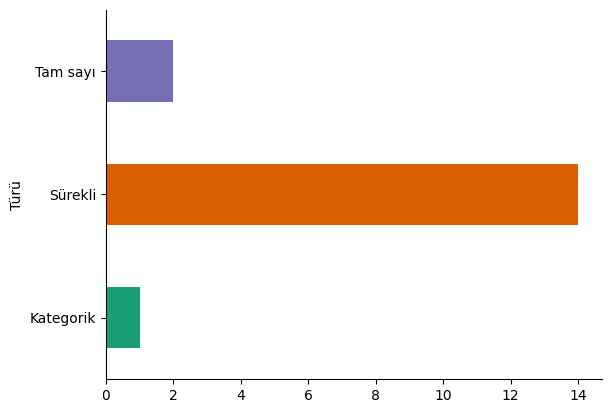

In [4]:
# @title TÃ¼rÃ¼

from matplotlib import pyplot as plt
import seaborn as sns
df_info.groupby('TÃ¼rÃ¼').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [96]:
# Temel Veri Ä°ÅŸleme
import pandas as pd
import numpy as np

# GÃ¶rselleÅŸtirme
import matplotlib.pyplot as plt
import seaborn as sns

# Ã–n Ä°ÅŸleme
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Boyut Ä°ndirgeme
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Modelleme
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Model DeÄŸerlendirme
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# UyarÄ±lar
import warnings
warnings.filterwarnings("ignore")


In [43]:
# Google Colab'a dosya yÃ¼klemek iÃ§in
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset (1).xlsx


In [3]:
# Excel dosyasÄ±nÄ± oku
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [44]:
print("Veri setinin boyutu:", df.shape)
df.head()

Veri setinin boyutu: (13611, 17)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [45]:
dry_bean = df.copy()

In [46]:
# %5 eksik veri eklenecek sÃ¼tunlar
for col in ['Area', 'Perimeter']:
    dry_bean.loc[dry_bean.sample(frac=0.05, random_state=42).index, col] = np.nan

# %35 eksik veri eklenecek sÃ¼tun
dry_bean.loc[df.sample(frac=0.35, random_state=1).index, 'Compactness'] = np.nan

# Eksik verileri gÃ¶zlemle
dry_bean.isnull().sum()

Area                681
Perimeter           681
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        4764
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

In [48]:
# %5 eksikleri ortalama ile doldur
for col in ['Area', 'Perimeter']:
    dry_bean[col] = dry_bean[col].fillna(dry_bean[col].mean())

# %35 eksik iÃ§eren 'Compactness' sÃ¼tununu SATIR bazlÄ± sil
dry_bean = dry_bean[dry_bean['Compactness'].notna()]

# Eksik veri kaldÄ± mÄ± kontrol et
print("Eksik veri sonrasÄ± durum:")
print(dry_bean.isnull().sum())

Eksik veri sonrasÄ± durum:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


Dry Bean veri setine, Ã¶dev yÃ¶nergesi doÄŸrultusunda `Area` ve `Perimeter` sÃ¼tunlarÄ±na %5 oranÄ±nda, `Compactness` sÃ¼tununa ise %35 oranÄ±nda eksik veri eklenmiÅŸtir. %5 eksik iÃ§eren sÃ¼tunlar, her sÃ¼tunun ortalamasÄ± ile doldurulmuÅŸ; %35 oranÄ±nda eksik iÃ§eren `Compactness` sÃ¼tunu ise satÄ±r bazlÄ± silinerek veri setinden temizlenmiÅŸtir. Bu iÅŸlemler sonrasÄ± eksik veri kalmamÄ±ÅŸtÄ±r.


## AykÄ±rÄ± DeÄŸer Tespiti

| YÃ¶ntem   | AÃ§Ä±klama                                                                 | KullanÄ±m Durumu                                     |
|----------|--------------------------------------------------------------------------|-----------------------------------------------------|
| **IQR (Interquartile Range)** | Q1 ve Q3 arasÄ±ndaki aralÄ±ÄŸÄ± baz alÄ±r. AykÄ±rÄ±lar bu aralÄ±ÄŸÄ±n 1.5 katÄ± dÄ±ÅŸÄ±ndakilerdir. | Veri daÄŸÄ±lÄ±mÄ± **asimetrik** veya medyan merkezliyse Ã¶nerilir |
| **Z-score** | DeÄŸerlerin standart sapmadan sapma miktarÄ±na bakar. | Veri **normal daÄŸÄ±lÄ±ma yakÄ±n** ise Ã¶nerilir         |


Dry Bean verisi biyolojik ve ÅŸekil temelli olduÄŸu iÃ§in genelde asimetrik daÄŸÄ±lÄ±r. Bu yÃ¼zden IQR yÃ¶ntemi daha uygun olur.

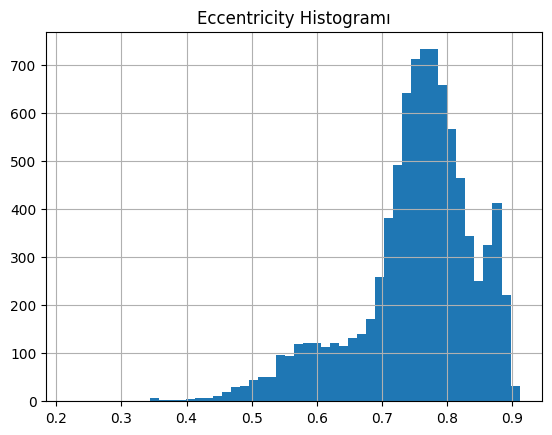

In [49]:
dry_bean['Eccentricity'].hist(bins=50)
plt.title("Eccentricity HistogramÄ±")
plt.show()

#### Histogram Yorum ve YÃ¶ntem SeÃ§imi: `Eccentricity`

AykÄ±rÄ± deÄŸer tespiti yÃ¶ntemi seÃ§ilirken, kullanÄ±lacak yÃ¶ntemin veri daÄŸÄ±lÄ±mÄ±na uygun olup olmadÄ±ÄŸÄ±nÄ± deÄŸerlendirmek kritik bir adÄ±mdÄ±r. Bu doÄŸrultuda, veri setindeki tÃ¼m sayÄ±sal deÄŸiÅŸkenler arasÄ±ndan `Eccentricity` deÄŸiÅŸkeni, histogram analizi iÃ§in Ã¶rnek olarak seÃ§ilmiÅŸtir. Bunun iki temel nedeni vardÄ±r:

1. `Eccentricity` daÄŸÄ±lÄ±mÄ±, Ã¶znitelikler arasÄ±nda en belirgin Ã§arpÄ±klÄ±k gÃ¶steren deÄŸiÅŸkenlerden biridir.  
   Bu durum, aykÄ±rÄ± deÄŸer tespiti yÃ¶nteminin seÃ§iminde belirleyici olabilecek simetriden uzak bir yapÄ±yÄ± temsil eder.

2. Bu deÄŸiÅŸkenin grafiksel analizi, asimetrik daÄŸÄ±lÄ±ma sahip bir Ã¶rnek Ã¼zerinden hangi yÃ¶ntemin (Z-score vs IQR) daha uygun olduÄŸunu gÃ¶stermek adÄ±na Ã¶ÄŸretici ve temsil edici bir Ã¶rnek sunar.

DolayÄ±sÄ±yla, aykÄ±rÄ± deÄŸer yÃ¶nteminin seÃ§imini somut bir daÄŸÄ±lÄ±m yapÄ±sÄ± Ã¼zerinde temellendirmek amacÄ±yla `Eccentricity` deÄŸiÅŸkeni kullanÄ±lmÄ±ÅŸtÄ±r.

`Eccentricity` deÄŸiÅŸkenine ait histogram incelendiÄŸinde, veri daÄŸÄ±lÄ±mÄ±nÄ±n simetrik olmadÄ±ÄŸÄ± ve saÄŸa Ã§arpÄ±k (pozitif Ã§arpÄ±klÄ±k) bir yapÄ± sergilediÄŸi gÃ¶zlemlenmiÅŸtir. Ã–zellikle 0.7 civarÄ±nda yoÄŸunlaÅŸan Ã¶rnekler ile yÃ¼ksek deÄŸerli uÃ§lar arasÄ±nda dengesizlik bulunmaktadÄ±r. Bu durum, dÃ¼ÅŸÃ¼k deÄŸerlere sahip Ã¶rneklerin sayÄ±sÄ±nÄ±n gÃ¶rece az, yÃ¼ksek deÄŸerlere sahip Ã¶rneklerin ise daha fazla olduÄŸunu gÃ¶stermektedir.

Veri daÄŸÄ±lÄ±mÄ±nÄ±n Ã§an eÄŸrisi ÅŸeklinde olmamasÄ± ve pozitif yÃ¶nde asimetri gÃ¶stermesi, bu deÄŸiÅŸkenin normal daÄŸÄ±lmadÄ±ÄŸÄ±nÄ± ortaya koymaktadÄ±r. Bu nedenle, standart sapmaya dayanan Z-score yÃ¶ntemi yerine, daÄŸÄ±lÄ±mÄ±n merkezi eÄŸilimlerini dikkate alan Ã§eyreklikler arasÄ± aralÄ±k (IQR) yÃ¶ntemi aykÄ±rÄ± deÄŸer tespiti iÃ§in daha gÃ¼venilir bulunmuÅŸtur.

SonuÃ§ olarak, `Eccentricity` deÄŸiÅŸkeni Ã¶zelinde ve genelde daÄŸÄ±lÄ±mÄ±n simetrik olmamasÄ± nedeniyle, IQR yÃ¶ntemi tercih edilmiÅŸ ve uygulanmÄ±ÅŸtÄ±r.


In [50]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_cols = dry_bean.select_dtypes(include=['float64', 'int64']).columns

# Her sÃ¼tunun Ã§arpÄ±klÄ±ÄŸÄ±nÄ± hesapla
skew_values = dry_bean[numeric_cols].skew().sort_values(ascending=False)

# DataFrame olarak gÃ¶ster
skew_values_df = pd.DataFrame(skew_values, columns=["Skewness"])
skew_values_df

Skewness
Area             3.007266
ConvexArea       2.916333
MinorAxisLength  2.209790
EquivDiameter    1.930511
Perimeter        1.657707
MajorAxisLength  1.349758
AspectRation     0.582614
ShapeFactor2     0.299554
ShapeFactor3     0.237153
Compactness      0.032943
ShapeFactor1    -0.527419
roundness       -0.637306
Extent          -0.878486
Eccentricity    -1.045540
Solidity        -2.536508
ShapeFactor4    -2.596160

#### Skewness DeÄŸeri ve YÃ¶ntem SeÃ§imi:

| Skewness DeÄŸeri      | DaÄŸÄ±lÄ±m Yorumu        | AykÄ±rÄ± Tespit YÃ¶ntemi     |
|----------------------|------------------------|----------------------------|
| â‰ˆ 0                  | Simetrik               | Z-score olabilir           |
| Â±0.5'ten bÃ¼yÃ¼k       | Orta dÃ¼zey asimetrik   | IQR Ã¶nerilir               |
| Â±1'den bÃ¼yÃ¼k         | Kuvvetli asimetrik     | Kesinlikle IQR kullanÄ±lmalÄ± |



Veri setindeki tÃ¼m sayÄ±sal deÄŸiÅŸkenler iÃ§in Ã§arpÄ±klÄ±k (skewness) deÄŸerleri hesaplanmÄ±ÅŸ ve bu deÄŸerlere gÃ¶re daÄŸÄ±lÄ±mlarÄ±n simetrik olup olmadÄ±ÄŸÄ± incelenmiÅŸtir. Normal daÄŸÄ±lÄ±mda skewness deÄŸeri 0'a yakÄ±n olurken, Â±1'in Ã¼zerindeki deÄŸerler gÃ¼Ã§lÃ¼ asimetrik daÄŸÄ±lÄ±mÄ± iÅŸaret eder.

Skewness deÄŸerleri incelendiÄŸinde `Area` (3.00), `ConvexArea` (2.91), `MinorAxisLength` (2.20), `EquivDiameter` (1.93) ve `Perimeter` (1.66) gibi birÃ§ok deÄŸiÅŸkende yÃ¼ksek pozitif Ã§arpÄ±klÄ±k gÃ¶zlenmiÅŸtir. AynÄ± ÅŸekilde `Eccentricity` (-1.04), `Solidity` (-2.53) ve `ShapeFactor4` (-2.59) gibi deÄŸiÅŸkenlerde de yÃ¼ksek negatif Ã§arpÄ±klÄ±k sÃ¶z konusudur.

Bu durum, veri setinin Ã¶nemli bir kÄ±smÄ±nda **asimetrik daÄŸÄ±lÄ±mlar** bulunduÄŸunu ortaya koymaktadÄ±r. DolayÄ±sÄ±yla, aykÄ±rÄ± deÄŸer tespiti iÃ§in standart sapma temelli Z-score yÃ¶ntemi yerine, daha dayanÄ±klÄ± ve asimetrik yapÄ±ya uygun olan IQR (Interquartile Range) yÃ¶ntemi tercih edilmiÅŸtir.

IQR yÃ¶ntemi, merkezi yayÄ±lÄ±mÄ± temel alarak Ã§an eÄŸrisi varsayÄ±mÄ± gerektirmediÄŸi iÃ§in, bu veri setinde daha gÃ¼venilir ve uygun bir seÃ§imdir.

In [51]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_cols = dry_bean.select_dtypes(include=['float64', 'int64']).columns

# AykÄ±rÄ± deÄŸerleri tespit et
outlier_counts = {}

for col in numeric_cols:
    Q1 = dry_bean[col].quantile(0.25)
    Q3 = dry_bean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dry_bean[(dry_bean[col] < lower_bound) | (dry_bean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# SonuÃ§larÄ± DataFrame olarak gÃ¶ster
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['AykÄ±rÄ± DeÄŸer SayÄ±sÄ±'])
outlier_df.sort_values('AykÄ±rÄ± DeÄŸer SayÄ±sÄ±', ascending=False)

AykÄ±rÄ± DeÄŸer SayÄ±sÄ±
Eccentricity                     548
Solidity                         509
ShapeFactor4                     491
MinorAxisLength                  369
Area                             363
ConvexArea                       357
ShapeFactor1                     343
EquivDiameter                    342
Perimeter                        318
AspectRation                     308
MajorAxisLength                  248
Extent                           160
ShapeFactor3                     128
Compactness                       70
roundness                         58
ShapeFactor2                       0

### AykÄ±rÄ± DeÄŸerlerle BaÅŸ Etme YÃ¶ntemleri ve Uygulama KararÄ±

IQR (Interquartile Range) yÃ¶ntemi kullanÄ±larak veri setindeki tÃ¼m sayÄ±sal sÃ¼tunlarda aykÄ±rÄ± deÄŸer tespiti yapÄ±lmÄ±ÅŸtÄ±r. Her sÃ¼tun iÃ§in Q1 ve Q3 deÄŸerleri Ã¼zerinden IQR hesaplanmÄ±ÅŸ, ardÄ±ndan 1.5 * IQR dÄ±ÅŸÄ±na Ã§Ä±kan gÃ¶zlemler aykÄ±rÄ± olarak deÄŸerlendirilmiÅŸtir.

Analiz sonucunda en Ã§ok aykÄ±rÄ± deÄŸere sahip deÄŸiÅŸkenlerin sÄ±rasÄ±yla `Eccentricity` (548), `Solidity` (509) ve `ShapeFactor4` (491) olduÄŸu gÃ¶rÃ¼lmektedir. Bu deÄŸiÅŸkenler aynÄ± zamanda daha Ã¶nce yapÄ±lan skewness analizinde de gÃ¼Ã§lÃ¼ asimetrik daÄŸÄ±lÄ±m gÃ¶steren Ã¶znitelikler arasÄ±nda yer almaktadÄ±r. Bu bulgu, daÄŸÄ±lÄ±mÄ±n Ã§arpÄ±klÄ±ÄŸÄ± ile aykÄ±rÄ± deÄŸer sÄ±klÄ±ÄŸÄ± arasÄ±nda doÄŸrudan bir iliÅŸki olduÄŸunu desteklemektedir.

Buna karÅŸÄ±n `ShapeFactor2` deÄŸiÅŸkeninde hiÃ§bir aykÄ±rÄ± deÄŸer bulunmamÄ±ÅŸtÄ±r. Bu durum, bu Ã¶znitelikteki daÄŸÄ±lÄ±mÄ±n hem merkezi eÄŸilim hem de yayÄ±lÄ±m aÃ§Ä±sÄ±ndan daha dengeli olduÄŸunu gÃ¶stermektedir.

AykÄ±rÄ± deÄŸer sayÄ±sÄ±nÄ±n Ã§ok yÃ¼ksek olduÄŸu deÄŸiÅŸkenlerde doÄŸrudan silme iÅŸlemi, veri kaybÄ±na yol aÃ§abileceÄŸinden; bu deÄŸerler alt ve Ã¼st sÄ±nÄ±rlarla sÄ±nÄ±rlanarak (clip) etkileri azaltÄ±lma yÃ¶ntemi uygulanacaktÄ±r. BÃ¶ylece veri bÃ¼tÃ¼nlÃ¼ÄŸÃ¼ korunmuÅŸ ve uÃ§ deÄŸerlerin model performansÄ±nÄ± bozmasÄ± Ã¶nlenecektir.


In [53]:
# Clip Ã¶ncesi istatistik
dry_bean[numeric_cols].describe().T[["min", "max"]]

min            max
Area             20420.000000  254616.000000
Perimeter          524.736000    1985.370000
MajorAxisLength    183.601165     738.860153
MinorAxisLength    122.512653     460.198497
AspectRation         1.024868       2.430306
Eccentricity         0.218951       0.911423
ConvexArea       20684.000000  263261.000000
EquivDiameter      161.243764     569.374358
Extent               0.555315       0.858420
Solidity             0.919246       0.994082
roundness            0.489618       0.987089
Compactness          0.640577       0.987303
ShapeFactor1         0.002778       0.010451
ShapeFactor2         0.000567       0.003564
ShapeFactor3         0.410339       0.974767
ShapeFactor4         0.947687       0.999709

In [54]:
# Uygulamadan Ã¶nce describe al
before_clip = dry_bean[numeric_cols].describe()

# AykÄ±rÄ± deÄŸerleri clip et
for col in numeric_cols:
    Q1 = dry_bean[col].quantile(0.25)
    Q3 = dry_bean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dry_bean[col] = dry_bean[col].clip(lower, upper)

# Uygulamadan sonra describe al
after_clip = dry_bean[numeric_cols].describe()

# KarÅŸÄ±laÅŸtÄ±rma tablosu oluÅŸtur
comparison = pd.DataFrame({
    "Min Ã–nce": before_clip.loc["min"],
    "Min Sonra": after_clip.loc["min"],
    "Max Ã–nce": before_clip.loc["max"],
    "Max Sonra": after_clip.loc["max"]
})
comparison

Min Ã–nce     Min Sonra       Max Ã–nce      Max Sonra
Area             20420.000000  20420.000000  254616.000000   95080.500000
Perimeter          524.736000    524.736000    1985.370000    1356.379500
MajorAxisLength    183.601165    183.601165     738.860153     560.941037
MinorAxisLength    122.512653    122.512653     460.198497     279.580000
AspectRation         1.024868      1.024868       2.430306       2.118080
Eccentricity         0.218951      0.575095       0.911423       0.911423
ConvexArea       20684.000000  20684.000000  263261.000000  100924.750000
EquivDiameter      161.243764    161.243764     569.374358     376.551935
Extent               0.555315      0.614460       0.858420       0.858420
Solidity             0.919246      0.979139       0.994082       0.994082
roundness            0.489618      0.703701       0.987089       0.987089
Compactness          0.640577      0.655533       0.987303       0.941020
ShapeFactor1         0.002778      0.003809       0.010451       0.009350
ShapeFactor2         0.000567      0.000567       0.003564       0.003564
ShapeFactor3         0.410339      0.410621       0.974767       0.866416
ShapeFactor4         0.947687      0.987426       0.999709       0.999709

Veri setinde tespit edilen aykÄ±rÄ± deÄŸerlerin etkisini azaltmak amacÄ±yla, IQR yÃ¶ntemine dayalÄ± alt ve Ã¼st sÄ±nÄ±r hesaplamalarÄ± yapÄ±lmÄ±ÅŸ ve bu sÄ±nÄ±rlar dÄ±ÅŸÄ±ndaki aykÄ±rÄ± deÄŸerler, ilgili sÄ±nÄ±r deÄŸerlerine eÅŸitlenmiÅŸtir (clip uygulanmÄ±ÅŸtÄ±r).

Clip iÅŸlemi Ã¶ncesi ve sonrasÄ± yapÄ±lan tanÄ±mlayÄ±cÄ± istatistik (describe) karÅŸÄ±laÅŸtÄ±rmasÄ±na gÃ¶re:

- `Area` sÃ¼tununda maksimum deÄŸer, 254616'dan 95080.5'e dÃ¼ÅŸÃ¼rÃ¼lerek Ã¶nemli bir uÃ§ deÄŸer etkisizleÅŸtirilmiÅŸtir.
- `Eccentricity` deÄŸiÅŸkeninde minimum deÄŸer 0.218'den 0.575'e Ã§ekilmiÅŸtir; bu, uÃ§ deÄŸerin alt sÄ±nÄ±rla sÄ±nÄ±rlandÄ±rÄ±ldÄ±ÄŸÄ±nÄ± gÃ¶stermektedir.
- Benzer ÅŸekilde `Perimeter`, `EquivDiameter`, `ConvexArea`, `ShapeFactor4` gibi deÄŸiÅŸkenlerde de maksimum deÄŸerlerde dikkat Ã§ekici bir azalma gÃ¶zlenmiÅŸtir.
- Minimum deÄŸerlerde ise bazÄ± sÃ¼tunlarda gÃ¶zle gÃ¶rÃ¼lÃ¼r deÄŸiÅŸiklikler sÄ±nÄ±rlÄ± kalmÄ±ÅŸtÄ±r, bu da Ã§oÄŸu aykÄ±rÄ± deÄŸerin Ã¼st uÃ§ta yoÄŸunlaÅŸtÄ±ÄŸÄ±nÄ± gÃ¶stermektedir.

Clip iÅŸlemi, veri setinden satÄ±r veya sÃ¼tun silmeden, aykÄ±rÄ± deÄŸerlerin etkisini azaltmÄ±ÅŸ ve daÄŸÄ±lÄ±mlarÄ±n aÅŸÄ±rÄ± uÃ§lardan arÄ±ndÄ±rÄ±lmasÄ±na katkÄ± saÄŸlamÄ±ÅŸtÄ±r. Bu sayede hem veri bÃ¼tÃ¼nlÃ¼ÄŸÃ¼ korunmuÅŸ hem de modelleme aÅŸamasÄ±nda algoritmalarÄ±n aykÄ±rÄ± deÄŸerlerden etkilenme riski azaltÄ±lmÄ±ÅŸtÄ±r.

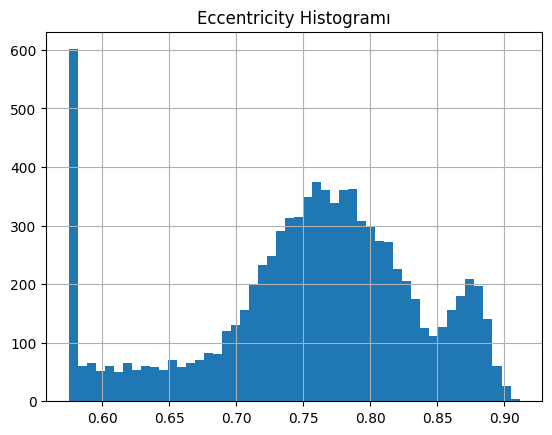

In [55]:
dry_bean['Eccentricity'].hist(bins=50)
plt.title("Eccentricity HistogramÄ±")
plt.show()

Clip uygulamasÄ± sonrasÄ± `Eccentricity` deÄŸiÅŸkenine ait histogram incelendiÄŸinde, daÄŸÄ±lÄ±mÄ±n alt sÄ±nÄ±r deÄŸerinde (yaklaÅŸÄ±k 0.575) belirgin bir yÄ±ÄŸÄ±lma oluÅŸtuÄŸu gÃ¶zlemlenmektedir. Bu durum, alt sÄ±nÄ±rÄ±n altÄ±nda kalan tÃ¼m aykÄ±rÄ± deÄŸerlerin bu eÅŸik deÄŸere eÅŸitlenmesinden kaynaklanÄ±r.

Grafikteki bu dikey yoÄŸunluk Ã§izgisi, clip yÃ¶nteminin karakteristik bir sonucudur ve uÃ§ deÄŸerlerin etkisini bastÄ±rma amacÄ±yla uygulanmÄ±ÅŸtÄ±r. DaÄŸÄ±lÄ±mÄ±n geri kalanÄ± daha dengeli gÃ¶rÃ¼nmekle birlikte, clip uygulamasÄ±nÄ±n etkisiyle veri artÄ±k bu sÄ±nÄ±rda yoÄŸunlaÅŸan bir kÃ¼meye sahiptir.

Bu uygulama sayesinde uÃ§ deÄŸerlerin model Ã¼zerindeki etkisi azaltÄ±lÄ±rken, veri kaybÄ± da yaÅŸanmamÄ±ÅŸtÄ±r. Ancak bu tÃ¼r bir dÃ¼zeltmenin, daÄŸÄ±lÄ±mÄ±n doÄŸal ÅŸeklini bozabileceÄŸi ve modelleme sÃ¼recinde dikkatle deÄŸerlendirilmesi gerektiÄŸi unutulmamalÄ±dÄ±r.


### Ã–zellik Ã–lÃ§ekleme (Feature Scaling)

Veri setinde yer alan sayÄ±sal Ã¶zniteliklerin farklÄ± bÃ¼yÃ¼klÃ¼kteki deÄŸer aralÄ±klarÄ±nda bulunmasÄ±, makine Ã¶ÄŸrenmesi algoritmalarÄ±nÄ±n performansÄ±nÄ± olumsuz etkileyebilecek bir durumdur. Ã–zellikle `Area`, `Perimeter` gibi deÄŸiÅŸkenler Ã§ok bÃ¼yÃ¼k deÄŸerlere sahipken, `ShapeFactor` gibi bazÄ± deÄŸiÅŸkenler oldukÃ§a kÃ¼Ã§Ã¼k deÄŸer aralÄ±klarÄ±nda yer almaktadÄ±r. Bu durum, modelin yÃ¼ksek deÄŸere sahip Ã¶znitelikleri daha "Ã¶nemli" olarak algÄ±lamasÄ±na neden olabilir.

Bu nedenle, tÃ¼m sayÄ±sal veriler **ortalamasÄ± 0, standart sapmasÄ± 1 olacak ÅŸekilde** dÃ¶nÃ¼ÅŸtÃ¼rÃ¼lerek aynÄ± Ã¶lÃ§ek dÃ¼zeyine getirilmiÅŸtir. Bu iÅŸlem iÃ§in `StandardScaler` yÃ¶ntemi kullanÄ±lmÄ±ÅŸtÄ±r.

`StandardScaler` yÃ¶ntemi Ã¶zellikle:
- Mesafeye dayalÄ± algoritmalar iÃ§in veri standardizasyonu saÄŸlar,
- PCA ve LDA gibi boyut indirgeme tekniklerinde Ã¶znitelikler arasÄ± baskÄ±yÄ± azaltÄ±r,
- Veri iÃ§indeki deÄŸiÅŸkenliÄŸi daha dengeli hÃ¢le getirir.

Ek olarak, veri setindeki aykÄ±rÄ± deÄŸerler clip yÃ¶ntemiyle bastÄ±rÄ±ldÄ±ÄŸÄ± iÃ§in, `StandardScaler` uygulamasÄ± bu uÃ§ deÄŸerlerin etkisini artÄ±rmamÄ±ÅŸ, aksine modelin daha dengeli Ã¶ÄŸrenmesine zemin hazÄ±rlamÄ±ÅŸtÄ±r. TÃ¼m bu nedenlerle, bu proje kapsamÄ±nda `StandardScaler` en uygun yÃ¶ntem olarak tercih edilmiÅŸtir.


In [74]:
# Ã–lÃ§ekleme Ã¶ncesi kopya al
before_scaling = dry_bean.copy()

In [75]:
# Sadece sayÄ±sal sÃ¼tunlarÄ± Ã¶lÃ§ekleyelim
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dry_bean[numeric_cols])

# Yeni Ã¶lÃ§eklenmiÅŸ dataframe oluÅŸtur
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Ä°steÄŸe baÄŸlÄ±: orijinal kategorik sÃ¼tunlarÄ± ekle
scaled_df["Class"] = dry_bean["Class"].values

In [76]:
# TÃ¼m preprocessing sonrasÄ± PCA ve LDA kullanÄ±m amaÃ§lÄ±
scaled_features_df = scaled_df.copy()

<Figure size 1600x1000 with 0 Axes>

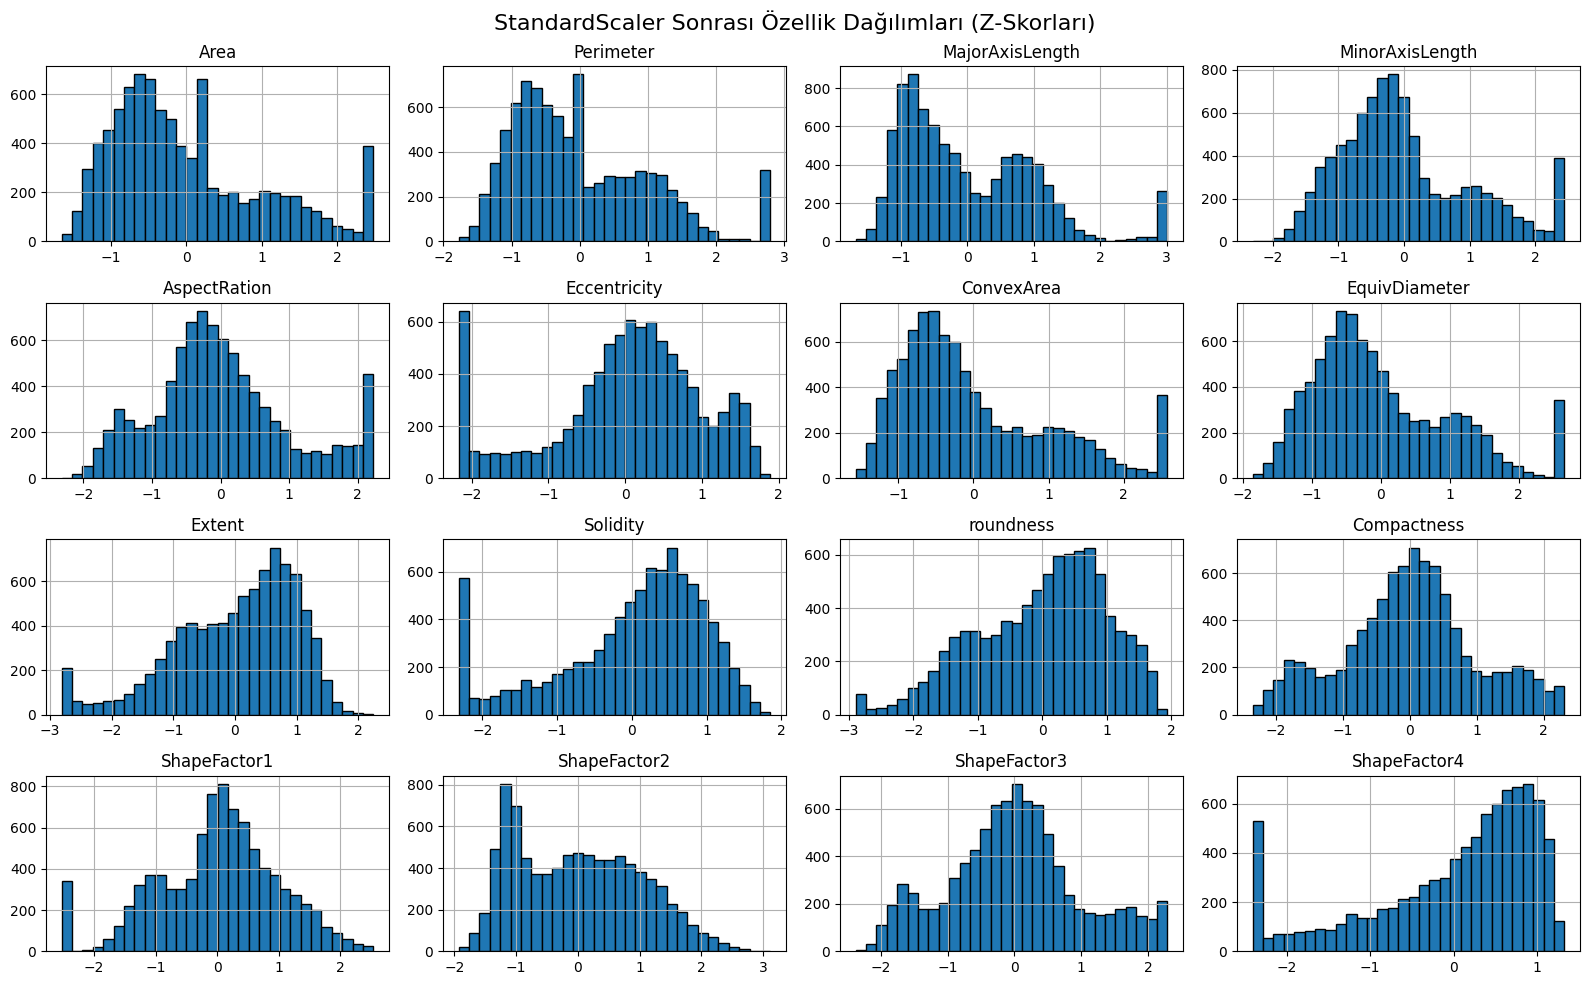

In [58]:
plt.figure(figsize=(16, 10))
scaled_df.drop("Class", axis=1).hist(bins=30, layout=(4, 4), figsize=(16, 10), edgecolor='black')
plt.suptitle("StandardScaler SonrasÄ± Ã–zellik DaÄŸÄ±lÄ±mlarÄ± (Z-SkorlarÄ±)", fontsize=16)
plt.tight_layout()
plt.show()

## Kategorik SÄ±nÄ±f Etiketlerinin SayÄ±sal Formata DÃ¶nÃ¼ÅŸtÃ¼rÃ¼lmesi

Veri setinde yer alan `Class` sÃ¼tunu, her gÃ¶zlemi ait olduÄŸu fasulye tÃ¼rÃ¼ne gÃ¶re kategorik olarak sÄ±nÄ±flandÄ±rmaktadÄ±r. Ancak makine Ã¶ÄŸrenmesi algoritmalarÄ± yalnÄ±zca sayÄ±sal girdilerle Ã§alÄ±ÅŸabildiÄŸinden, bu kategorik sÄ±nÄ±f etiketlerinin uygun ÅŸekilde dÃ¶nÃ¼ÅŸtÃ¼rÃ¼lmesi gerekmektedir.

Bu aÅŸamada, `Class` sÃ¼tunundaki her benzersiz kategori deÄŸeri, **LabelEncoder** kullanÄ±larak benzersiz bir tam sayÄ± ile eÅŸleÅŸtirilmiÅŸtir.


In [77]:
# Label encoder nesnesi oluÅŸtur
le = LabelEncoder()

# Kategorik Class sÃ¼tununu sayÄ±sala dÃ¶nÃ¼ÅŸtÃ¼r
scaled_df["Class_encoded"] = le.fit_transform(scaled_df["Class"])

# Gerekirse orijinali kaldÄ±r
scaled_df = scaled_df.drop("Class", axis=1)

# Kodlama eÅŸlemesi (opsiyonel, rapor iÃ§in)
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_map)

Label Mapping: {'BARBUNYA': np.int64(0), 'BOMBAY': np.int64(1), 'CALI': np.int64(2), 'DERMASON': np.int64(3), 'HOROZ': np.int64(4), 'SEKER': np.int64(5), 'SIRA': np.int64(6)}


## Ã–zellik SeÃ§imi ve Boyut Ä°ndirgeme

1. Ham (Preprocessed) Veri
DeÄŸiÅŸken AdÄ±: processed_df

Ä°Ã§erik: Eksik deÄŸer doldurulmuÅŸ, aykÄ±rÄ± deÄŸerler clip ile sÄ±nÄ±rlandÄ±rÄ±lmÄ±ÅŸ, StandardScaler ile Ã¶lÃ§eklenmiÅŸ, LabelEncoder uygulanmÄ±ÅŸ hÃ¢lidir.

AmaÃ§: Modellemeye temel oluÅŸturacak tam ve temizlenmiÅŸ veri kÃ¼mesi.

2. PCA ile Ä°ndirgenmiÅŸ Veri
DeÄŸiÅŸken AdÄ±: pca_df

Ä°Ã§erik: scaled_features_df'ten PCA uygulanarak elde edilmiÅŸtir. Sadece sayÄ±sal sÃ¼tunlara PCA uygulanmÄ±ÅŸtÄ±r, ilk 2 bileÅŸen (PC1, PC2) gÃ¶rselleÅŸtirme iÃ§in kullanÄ±lmÄ±ÅŸtÄ±r.

AmaÃ§: VaryansÄ± koruyarak boyut indirgeme ve sÄ±nÄ±flar arasÄ± ayrÄ±mÄ±n gÃ¶rsel analizi.

3. LDA ile Ä°ndirgenmiÅŸ Veri
DeÄŸiÅŸken AdÄ±: lda_df

Ä°Ã§erik: processed_dfâ€™ten Class_encoded hedef deÄŸiÅŸkeniyle birlikte LinearDiscriminantAnalysis uygulanarak elde edilmiÅŸtir. Ä°lk 2 bileÅŸen (LD1, LD2) gÃ¶rselleÅŸtirme iÃ§indir.

AmaÃ§: SÄ±nÄ±flar arasÄ±ndaki farkÄ± maksimize eden doÄŸrusal bileÅŸenlerle temsil edilen veri kÃ¼mesi.

### Ham Veri Ãœzerinde Ã–n Ä°ÅŸleme Verisi

In [78]:
# TÃ¼m preprocessing sonrasÄ±
processed_df = scaled_df.copy()

In [79]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class_encoded    8847 non-null   int64  
dtypes: float64(16)

In [80]:
scaled_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class            8847 non-null   object 
dtypes: float64(16)

In [82]:
# SayÄ±sal Ã¶zellikleri al (Class hariÃ§)
X = scaled_features_df.drop("Class", axis=1)
y = scaled_features_df["Class"]

# PCA modelini oluÅŸtur ve uygula
pca = PCA()
X_pca = pca.fit_transform(X)

# AÃ§Ä±klanan varyans oranlarÄ±nÄ± gÃ¶ster
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

In [70]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class_encoded    8847 non-null   int64  
dtypes: float64(16)

### PCA ile Boyut Ä°ndirgeme UygulamasÄ±

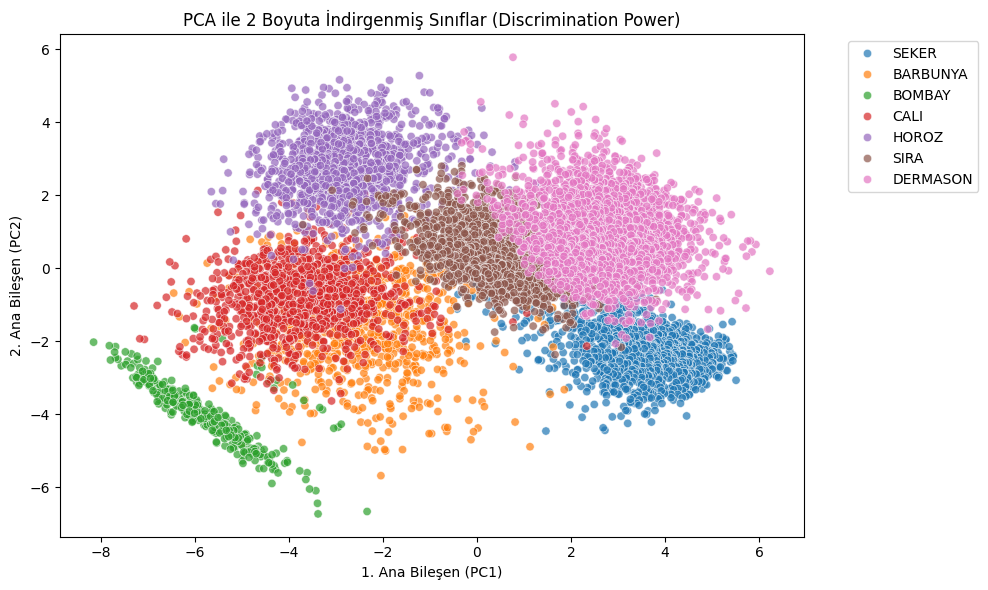

In [84]:
# PCA sonuÃ§larÄ±nÄ± DataFrame olarak oluÅŸtur
pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
pca_df["Class"] = y.values  # y zaten scaled_features_df["Class"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Class", palette="tab10", alpha=0.7)
plt.title("PCA ile 2 Boyuta Ä°ndirgenmiÅŸ SÄ±nÄ±flar (Discrimination Power)")
plt.xlabel("1. Ana BileÅŸen (PC1)")
plt.ylabel("2. Ana BileÅŸen (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

YukarÄ±daki grafik, PCA (Principal Component Analysis) yÃ¶ntemi ile 16 boyutlu sayÄ±sal Ã¶zelliklerin yalnÄ±zca iki ana bileÅŸene indirgenerek gÃ¶rselleÅŸtirilmesini gÃ¶stermektedir. "PC1" ve "PC2" adlÄ± bu bileÅŸenler, veri setindeki toplam varyansÄ±n bÃ¼yÃ¼k bir kÄ±smÄ±nÄ± temsil eder.

SÄ±nÄ±flar belirgin ÅŸekilde gruplanmÄ±ÅŸtÄ±r, bu da PCAâ€™nÄ±n sÄ±nÄ±flar arasÄ±ndaki ayrÄ±mÄ± gÃ¼Ã§lÃ¼ biÃ§imde koruduÄŸunu gÃ¶sterir.

Ã–rneÄŸin Bombay sÄ±nÄ±fÄ± (yeÅŸil), diÄŸerlerinden oldukÃ§a farklÄ± bir konumda kÃ¼melenmiÅŸtir. Bu durum, Bombay fasulyelerinin morfolojik olarak belirgin farklÄ±lÄ±klara sahip olduÄŸunu gÃ¶stermektedir.

DiÄŸer sÄ±nÄ±flar arasÄ±nda bazÄ± Ã¶rtÃ¼ÅŸmeler (Ã¶rneÄŸin Seker ve Dermason gibi) olsa da, genel olarak sÄ±nÄ±f ayrÄ±mÄ± anlamlÄ±dÄ±r.

Bu daÄŸÄ±lÄ±m, PCAâ€™nÄ±n veri boyutunu azaltÄ±rken bilgiyi koruma kapasitesinin yÃ¼ksek olduÄŸunu ve modelleme iÃ§in iyi bir Ã¶znitelik Ã§Ä±karmasÄ± saÄŸladÄ±ÄŸÄ±nÄ± gÃ¶sterir.

## LDA ile Etiket Bilgisine DayalÄ± Boyut Ä°ndirgeme

In [88]:
# Ã–zellikler ve etiketler
X = processed_df.drop("Class_encoded", axis=1)
y = processed_df["Class_encoded"]

# LDA modeli (3 bileÅŸen)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X, y)

# GÃ¶rselleÅŸtirme iÃ§in ilk 2 bileÅŸen
lda_df = pd.DataFrame(X_lda[:, :2], columns=["LD1", "LD2"])
lda_df["Class"] = y

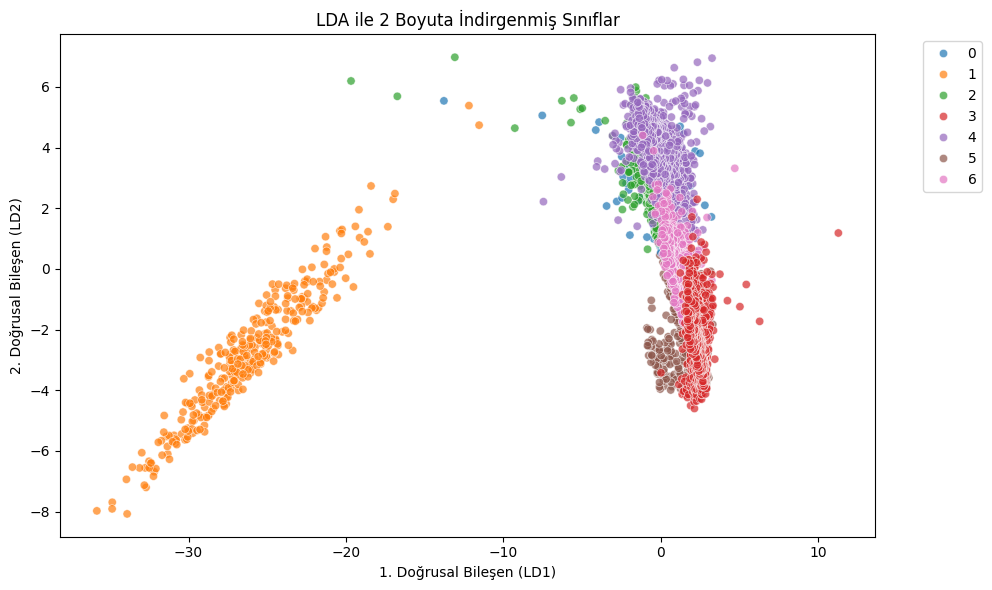

In [89]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Class", palette="tab10", alpha=0.7)
plt.title("LDA ile 2 Boyuta Ä°ndirgenmiÅŸ SÄ±nÄ±flar")
plt.xlabel("1. DoÄŸrusal BileÅŸen (LD1)")
plt.ylabel("2. DoÄŸrusal BileÅŸen (LD2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

LDA SonrasÄ± SÄ±nÄ±f AyrÄ±mÄ± Analizi (Discriminative Power)
LD1 (1. DoÄŸrusal BileÅŸen) ekseni sÄ±nÄ±flar arasÄ±nda en yÃ¼ksek ayrÄ±mÄ± saÄŸlÄ±yor. Ã–zellikle sÄ±nÄ±f 1 (turuncu) diÄŸerlerinden oldukÃ§a farklÄ± bir bÃ¶lgede kÃ¼melenmiÅŸ. Bu, LD1 bileÅŸeninin bu sÄ±nÄ±fÄ± ayÄ±rmada Ã§ok etkili olduÄŸunu gÃ¶steriyor.

DiÄŸer sÄ±nÄ±flar (0, 2, 3, 4, 5, 6) LD1 ve LD2 Ã¼zerinde birbirinden temizce ayrÄ±lmÄ±ÅŸ, kÃ¼Ã§Ã¼k bÃ¶lgelerde kÃ¼melenmiÅŸ gÃ¶rÃ¼nÃ¼yor.

BazÄ± sÄ±nÄ±flar arasÄ±nda (Ã¶rneÄŸin 5 ve 6) ufak Ã¶rtÃ¼ÅŸmeler var; ancak genel olarak LDA dÃ¶nÃ¼ÅŸÃ¼mÃ¼ Ã§ok baÅŸarÄ±lÄ± olmuÅŸ, sÄ±nÄ±flar neredeyse lineer ayrÄ±labilir hale gelmiÅŸ.

## Nested Cross-Validation YapÄ±sÄ±

In [90]:
# Model Ã¶rneÄŸi (diÄŸer modeller iÃ§in deÄŸiÅŸtirilebilir)
model = RandomForestClassifier(random_state=42)

# Hiperparametre aralÄ±ÄŸÄ± (inner loop iÃ§in)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

# Ä°Ã§ dÃ¶ngÃ¼: Hiperparametre ayarÄ± (sabit veri bÃ¶lÃ¼nmesi)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# GridSearchCV modeli: Ä°Ã§ dÃ¶ngÃ¼de hiperparametre seÃ§imi yapÄ±lÄ±r
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv)

# DÄ±ÅŸ dÃ¶ngÃ¼: Model performansÄ± deÄŸerlendirme (rastgele veri bÃ¶lÃ¼nmesi her adÄ±mda)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Nested cross-validation uygulanÄ±r
nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv)

# SonuÃ§larÄ± gÃ¶ster
print("Nested CV Ortalama BaÅŸarÄ±:", nested_scores.mean())
print("Nested CV Standart Sapma:", nested_scores.std())

Nested CV Ortalama BaÅŸarÄ±: 0.9202008859421358
Nested CV Standart Sapma: 0.0074452504621552295


Nested Cross-Validation yapÄ±sÄ±nda, dÄ±ÅŸ dÃ¶ngÃ¼ (5-fold) modelin genel performansÄ±nÄ± deÄŸerlendirmek iÃ§in kullanÄ±lmÄ±ÅŸ, iÃ§ dÃ¶ngÃ¼ (3-fold) ise hiperparametre ayarlamasÄ± amacÄ±yla sabit veri bÃ¶lÃ¼nmesiyle yapÄ±landÄ±rÄ±lmÄ±ÅŸtÄ±r. Bu sayede model, her dÄ±ÅŸ dÃ¶ngÃ¼ adÄ±mÄ±nda farklÄ± test kÃ¼meleri Ã¼zerinde denenmiÅŸ ve iÃ§ dÃ¶ngÃ¼deki ayar sabit kalarak tutarlÄ± sonuÃ§lar elde edilmiÅŸtir.


### Nested Cross-Validation: Ham Veri Ãœzerinde Model KarÅŸÄ±laÅŸtÄ±rmasÄ± (processed_df)

In [97]:
# Veri
X_raw = processed_df.drop("Class_encoded", axis=1)
y_raw = processed_df["Class_encoded"]

# Modeller
models_raw = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "NaiveBayes": GaussianNB()
}

# Hiperparametreler
param_grids_raw = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "DecisionTree": {"max_depth": [None, 10, 20]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "XGBoost": {"n_estimators": [50, 100], "max_depth": [3, 5]},
    "NaiveBayes": {}
}

# Skorlar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# CV YapÄ±sÄ±
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SonuÃ§larÄ± topla
results_raw = {}

for name, model in models_raw.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids_raw[name], cv=inner_cv, scoring=scoring, refit='accuracy')
    scores = cross_validate(grid, X_raw, y_raw, cv=outer_cv, scoring=scoring, return_train_score=False)

    results_raw[name] = {
        "accuracy_mean": scores['test_accuracy'].mean(),
        "accuracy_std": scores['test_accuracy'].std(),
        "precision_mean": scores['test_precision_macro'].mean(),
        "recall_mean": scores['test_recall_macro'].mean(),
        "f1_mean": scores['test_f1_macro'].mean()
    }

results_raw

{'LogisticRegression': {'accuracy_mean': np.float64(0.924381868526698),
  'accuracy_std': np.float64(0.003956096326690523),
  'precision_mean': np.float64(0.9369496656790812),
  'recall_mean': np.float64(0.9351156752979707),
  'f1_mean': np.float64(0.9359170825939129)},
 'DecisionTree': {'accuracy_mean': np.float64(0.8978207228700181),
  'accuracy_std': np.float64(0.008650522576585716),
  'precision_mean': np.float64(0.9127608505001247),
  'recall_mean': np.float64(0.910169030375098),
  'f1_mean': np.float64(0.9111395412691682)},
 'RandomForest': {'accuracy_mean': np.float64(0.9205395496194665),
  'accuracy_std': np.float64(0.006731662907146353),
  'precision_mean': np.float64(0.9334414659254904),
  'recall_mean': np.float64(0.9307992892408883),
  'f1_mean': np.float64(0.9319831459856106)},
 'XGBoost': {'accuracy_mean': np.float64(0.9216687905005541),
  'accuracy_std': np.float64(0.0019597970185225065),
  'precision_mean': np.float64(0.9343824267690419),
  'recall_mean': np.float64(0.9

### Nested Cross-Validation: PCA DÃ¶nÃ¼ÅŸtÃ¼rÃ¼lmÃ¼ÅŸ Veri Ãœzerinde Model KarÅŸÄ±laÅŸtÄ±rmasÄ± (pca_df)

In [98]:
# PCA'dan gelen veri (ilk iki bileÅŸen kullanÄ±lÄ±yor)
X_pca = pca_df[["PC1", "PC2"]]
y_pca = processed_df["Class_encoded"]

# Modeller (pca iÃ§in aynÄ±dÄ±r)
models_pca = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "NaiveBayes": GaussianNB()
}

# Hiperparametreler (pca iÃ§in aynÄ±dÄ±r)
param_grids_pca = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "DecisionTree": {"max_depth": [None, 10, 20]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "XGBoost": {"n_estimators": [50, 100], "max_depth": [3, 5]},
    "NaiveBayes": {}
}

# SkorlayÄ±cÄ±lar ve CV yapÄ±larÄ± Ã¶ncekiyle aynÄ± kullanÄ±lÄ±r

# SonuÃ§larÄ± kaydet
results_pca = {}

for name, model in models_pca.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids_pca[name], cv=inner_cv, scoring=scoring, refit='accuracy')
    scores = cross_validate(grid, X_pca, y_pca, cv=outer_cv, scoring=scoring, return_train_score=False)

    results_pca[name] = {
        "accuracy_mean": scores['test_accuracy'].mean(),
        "accuracy_std": scores['test_accuracy'].std(),
        "precision_mean": scores['test_precision_macro'].mean(),
        "recall_mean": scores['test_recall_macro'].mean(),
        "f1_mean": scores['test_f1_macro'].mean()
    }
results_pca

{'LogisticRegression': {'accuracy_mean': np.float64(0.8699005151494827),
  'accuracy_std': np.float64(0.008719019660952607),
  'precision_mean': np.float64(0.8647695936343014),
  'recall_mean': np.float64(0.859543924566298),
  'f1_mean': np.float64(0.860811928382932)},
 'DecisionTree': {'accuracy_mean': np.float64(0.8458249897002041),
  'accuracy_std': np.float64(0.006489547783806558),
  'precision_mean': np.float64(0.8451380553921961),
  'recall_mean': np.float64(0.8398931260238678),
  'f1_mean': np.float64(0.841573570077496)},
 'RandomForest': {'accuracy_mean': np.float64(0.8667362262186495),
  'accuracy_std': np.float64(0.0089700574122842),
  'precision_mean': np.float64(0.8652365463339036),
  'recall_mean': np.float64(0.8567974674897888),
  'f1_mean': np.float64(0.8596154238984415)},
 'XGBoost': {'accuracy_mean': np.float64(0.864701050419497),
  'accuracy_std': np.float64(0.01016293955882966),
  'precision_mean': np.float64(0.8585655222878985),
  'recall_mean': np.float64(0.8538270

### Nested Cross-Validation: LDA DÃ¶nÃ¼ÅŸtÃ¼rÃ¼lmÃ¼ÅŸ Veri Ãœzerinde Model KarÅŸÄ±laÅŸtÄ±rmasÄ± (lda_df)

In [99]:
# Veri: LDA bileÅŸenleri ve sÄ±nÄ±f etiketleri
X_lda = lda_df[["LD1", "LD2"]]
y_lda = lda_df["Class"]

# Modeller
models_lda = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "NaiveBayes": GaussianNB()
}

# Hiperparametreler
param_grids_lda = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "DecisionTree": {"max_depth": [None, 10, 20]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "XGBoost": {"n_estimators": [50, 100], "max_depth": [3, 5]},
    "NaiveBayes": {}
}

# SkorlayÄ±cÄ±lar ve CV yapÄ±larÄ± Ã¶ncekiyle aynÄ± kullanÄ±lÄ±r

# SonuÃ§larÄ± sakla
results_lda = {}

for name, model in models_lda.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids_lda[name], cv=inner_cv, scoring=scoring, refit='accuracy')
    scores = cross_validate(grid, X_lda, y_lda, cv=outer_cv, scoring=scoring, return_train_score=False)

    results_lda[name] = {
        "accuracy_mean": scores['test_accuracy'].mean(),
        "accuracy_std": scores['test_accuracy'].std(),
        "precision_mean": scores['test_precision_macro'].mean(),
        "recall_mean": scores['test_recall_macro'].mean(),
        "f1_mean": scores['test_f1_macro'].mean()
    }
results_lda

{'LogisticRegression': {'accuracy_mean': np.float64(0.7454515143095304),
  'accuracy_std': np.float64(0.009937768274254726),
  'precision_mean': np.float64(0.7576850493532732),
  'recall_mean': np.float64(0.7442183376019432),
  'f1_mean': np.float64(0.7479687914019962)},
 'DecisionTree': {'accuracy_mean': np.float64(0.7546066116705471),
  'accuracy_std': np.float64(0.009049095880823626),
  'precision_mean': np.float64(0.7638708576787232),
  'recall_mean': np.float64(0.7564038008960887),
  'f1_mean': np.float64(0.7590456473964572)},
 'RandomForest': {'accuracy_mean': np.float64(0.774387968560871),
  'accuracy_std': np.float64(0.008850601277699773),
  'precision_mean': np.float64(0.7831350702878269),
  'recall_mean': np.float64(0.7741389036464202),
  'f1_mean': np.float64(0.777269316879439)},
 'XGBoost': {'accuracy_mean': np.float64(0.7731449029583569),
  'accuracy_std': np.float64(0.008114291837346691),
  'precision_mean': np.float64(0.7835965245308478),
  'recall_mean': np.float64(0.77

### ðŸ§ª Nested Cross-Validation SonuÃ§larÄ± â€“ 3 Veri Temsili KarÅŸÄ±laÅŸtÄ±rmasÄ±

| Model             | Veri KÃ¼mesi     | Accuracy | Precision | Recall  | F1 Score |
|------------------|------------------|----------|-----------|---------|----------|
| LogisticRegression | Ham (`processed_df`) | **0.9244** | **0.9370** | **0.9351** | **0.9359** |
| LogisticRegression | PCA (`pca_df`)       | 0.8699     | 0.8648    | 0.8595  | 0.8608   |
| LogisticRegression | LDA (`lda_df`)       | 0.7455     | 0.7577    | 0.7442  | 0.7480   |
| DecisionTree       | Ham                 | **0.8978** | **0.9128** | **0.9102** | **0.9111** |
| DecisionTree       | PCA                 | 0.8458     | 0.8451    | 0.8399  | 0.8416   |
| DecisionTree       | LDA                 | 0.7546     | 0.7639    | 0.7564  | 0.7590   |
| RandomForest       | Ham                 | **0.9205** | **0.9334** | **0.9308** | **0.9320** |
| RandomForest       | PCA                 | 0.8667     | 0.8652    | 0.8568  | 0.8596   |
| RandomForest       | LDA                 | 0.7744     | 0.7831    | 0.7741  | 0.7773   |
| XGBoost            | Ham                 | **0.9217** | **0.9344** | **0.9327** | **0.9334** |
| XGBoost            | PCA                 | 0.8647     | 0.8586    | 0.8538  | 0.8554   |
| XGBoost            | LDA                 | 0.7731     | 0.7836    | 0.7729  | 0.7768   |
| NaiveBayes         | Ham                 | **0.9008** | **0.9106** | **0.9106** | **0.9100** |
| NaiveBayes         | PCA                 | 0.8609     | 0.8534    | 0.8505  | 0.8480   |
| NaiveBayes         | LDA                 | 0.7207     | 0.7489    | 0.7159  | 0.7139   |

---

### Analiz

- **En yÃ¼ksek performans** tÃ¼m metriklerde ham veri (processed_df) ile elde edilmiÅŸtir.
- **PCA**, bilgi kaybÄ± nedeniyle tÃ¼m modellerde dÃ¼ÅŸÃ¼k sonuÃ§lar Ã¼retmiÅŸ ancak hÃ¢lÃ¢ kabul edilebilir dÃ¼zeydedir.
- **LDA**, sÄ±nÄ±f ayrÄ±mÄ±nÄ± vurgulasa da sÄ±nÄ±flandÄ±rma performansÄ± en dÃ¼ÅŸÃ¼k olan veri temsili olmuÅŸtur.
- **Logistic Regression, XGBoost ve Random Forest**, ham veri Ã¼zerinde en baÅŸarÄ±lÄ± Ã¼Ã§ modeldir.
